# Taller Interactivo: Árboles de Decisión y Evaluación de Modelos

## Caso de Estudio: Social_Network_Ads

Este taller profesional se centra en la construcción, interpretación y evaluación de un modelo de Árbol de Decisión utilizando el dataset _Social_Network_Ads_. Se evaluarán aspectos técnicos y se comparará el desempeño con un modelo de Regresión Logística, analizando métricas de evaluación y posibles indicadores de sobreajuste.

## 2. Objetivos del Taller

En este taller se pretende:
- Comprender los fundamentos teóricos de los árboles de decisión.
- Realizar un análisis exploratorio y revisión de datos.
- Aplicar la estratificación en el particionado de datos.
- Entrenar y evaluar un modelo de Árbol de Decisión.
- Visualizar y analizar la matriz de confusión y la curva ROC.
- Ajustar el modelo para controlar la complejidad y el sobreajuste.
- Promover el análisis crítico de los resultados obtenidos.

## 3. Carga del Dataset y Primer Análisis

En esta sección se carga el dataset _Social_Network_Ads_ desde una URL y se visualizan las primeras filas y la información general. Esto permitirá conocer la estructura de los datos y los tipos de variables presentes.

In [1]:
!wget https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/Social_Network_Ads.csv

--2025-04-09 21:34:12--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/Social_Network_Ads.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10926 (11K) [text/plain]
Saving to: ‘Social_Network_Ads.csv’

Social_Network_Ads. 100%[===================>]  10.67K  --.-KB/s    in 0s      

2025-04-09 21:34:12 (43.7 MB/s) - ‘Social_Network_Ads.csv’ saved [10926/10926]



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt





In [ ]:
# Mostrar las primeras filas



In [ ]:
# Información general del dataset


## 4. Revisión de Variables y Tipos de Datos

Examina las variables del dataset y discute brevemente el significado de cada una. Reflexiona sobre la relevancia de cada variable para el análisis y el modelado.

In [4]:
data = pd.read_csv('Social_Network_Ads.csv')

# Display information about the dataset
print(data.info())

# Describe the variables
print(data.describe(include='all'))

# Examine the first few rows
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None
             User ID  Gender         Age  EstimatedSalary   Purchased
count   4.000000e+02     400  400.000000       400.000000  400.000000
unique           NaN       2         NaN              NaN         NaN
top              NaN  Female         NaN              NaN         NaN
freq             NaN     204         NaN              NaN         NaN
mean    1.569154e+07     NaN   37.655000     69742.500000    0.357500
std     7.165832e+04     NaN   10.482877     34096.960282    0.479864
min     1.556669e+07     NaN   18.0

Análisis de cada variable:
# User ID: Identificador único de cada usuario.  No es relevante para el análisis predictivo.
# Gender: Género del usuario (Male/Female).  Podría ser relevante para el análisis, ya que puede haber diferencias en el comportamiento de compra entre géneros.
# Age: Edad del usuario.  Variable importante, ya que la edad suele estar relacionada con el poder adquisitivo y las preferencias de consumo.
# EstimatedSalary: Salario estimado del usuario.  Probablemente una variable crucial para predecir la compra de productos o servicios.
# Purchased: Variable objetivo (0/1), indicando si el usuario compró el producto o servicio anunciado.

# Consideraciones adicionales:
# - Es importante explorar la distribución de cada variable y su relación con la variable objetivo.
# - Se deben buscar valores atípicos o errores en los datos.
# - Podría ser necesario realizar una transformación de las variables para mejorar el modelo.
# - Se deben considerar variables categóricas como "Gender" para su adecuada codificación (one-hot encoding, por ejemplo) antes del entrenamiento de un modelo.

# Ejemplo de exploración adicional (distribución de edades según la compra)
# sns.histplot(data=data, x='Age', hue='Purchased')
# plt.show()

## 5. Visualización de la Distribución de la Variable Objetivo

Visualiza la distribución de la variable `Purchased` usando un gráfico de barras. Esto permitirá identificar si existe un balance entre las clases.

**Pregunta para el grupo:**
- ¿La variable `Purchased` se encuentra balanceada? ¿Qué implicaciones podría tener un desequilibrio en la modelación?

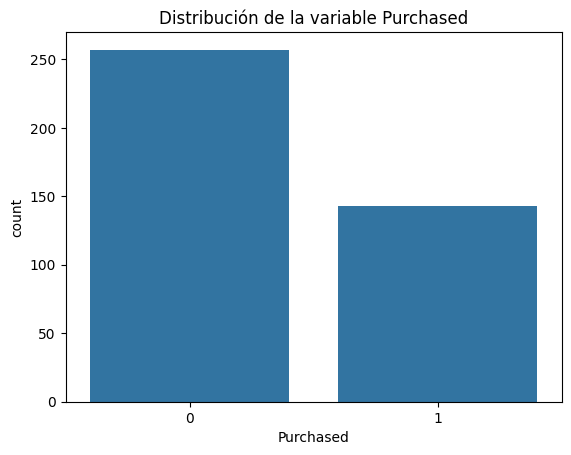

In [6]:
# Visualización de la distribución de la variable objetivo
sns.countplot(x='Purchased', data=data)
plt.title('Distribución de la variable Purchased')
plt.show()


In [7]:
purchased_counts = data['Purchased'].value_counts(normalize=True) * 100

# Print the class distribution
print(f"Class Distribution:\n{purchased_counts}")

# Check for class imbalance (e.g., a difference greater than 10%)
imbalance_threshold = 10
if abs(purchased_counts[0] - purchased_counts[1]) > imbalance_threshold:
    print("\nWarning: The 'Purchased' variable shows a significant class imbalance.")
    print("This could affect model performance and require techniques like oversampling or undersampling.")
else:
  print("\nThe 'Purchased' variable appears to be relatively balanced.")


Class Distribution:
Purchased
0    64.25
1    35.75
Name: proportion, dtype: float64

This could affect model performance and require techniques like oversampling or undersampling.


## 6. Análisis de la Distribución y Reflexión

Discute la distribución observada. Reflexiona sobre cómo un posible desbalance podría afectar la performance del modelo y qué estrategias se podrían utilizar para mitigarlo (por ejemplo, SMOTE en otros casos).

# Basándonos en el gráfico de barras y en el porcentaje de cada clase, podemos observar la distribución de la variable 'Purchased'.
# Si existe un desbalance significativo (una clase con mucha mayor representación que la otra), esto puede afectar negativamente la performance del modelo, particularmente en la predicción de la clase minoritaria.

# Impacto de un desbalance:

# * Sesgo en el modelo:  Un modelo entrenado con datos desbalanceados tiende a favorecer la clase mayoritaria, ya que busca minimizar el error global.  Esto puede resultar en una baja precisión para la clase minoritaria, incluso si la precisión general es alta.
# * Métricas engañosas: Métricas como la precisión general pueden ser altas incluso si el modelo predice mal la clase minoritaria.  Es necesario analizar métricas más informativas como la precisión, recall y F1-score para cada clase, y la curva ROC AUC.
# * Baja capacidad de generalización: Un modelo sesgado hacia la clase mayoritaria puede tener dificultades para generalizar bien a nuevos datos, especialmente aquellos con una mayor proporción de la clase minoritaria.

# Estrategias para mitigar el desbalance:

# * Oversampling (sobremuestreo): Aumentar la representación de la clase minoritaria mediante técnicas como la replicación de muestras existentes o la generación de nuevas muestras sintéticas (por ejemplo, SMOTE - Synthetic Minority Over-sampling Technique).
# * Undersampling (submuestreo): Reducir la representación de la clase mayoritaria eliminando aleatoriamente algunas muestras.  Esta técnica puede llevar a pérdida de información.
# * Cost-sensitive learning: Ajustar el algoritmo de aprendizaje para que penalice más los errores de clasificación de la clase minoritaria.
# * Ensemble methods: Combinar varios modelos entrenados con diferentes estrategias de muestreo o pesos para las clases.

# En este caso, si se observara un desbalance significativo, se podría explorar la aplicación de SMOTE o alguna técnica de sobremuestreo para equilibrar las clases y mejorar el rendimiento del modelo en la predicción de la clase minoritaria.  También se debería analizar cuidadosamente las métricas de evaluación, considerando la precisión, el recall y la F1-score para cada clase, en lugar de depender únicamente de la precisión global.



## 7. Selección de Variables para el Modelo

Para este taller, se utilizarán las variables `Age` y `EstimatedSalary` como características para predecir `Purchased`.

**Pregunta:**
- ¿Por qué considerarían estas dos variables relevantes para predecir la compra?

In [ ]:
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']


Las variables `Age` y `EstimatedSalary` son relevantes para predecir la compra porque:

* **Edad (`Age`):**  Generalmente, la edad de un individuo está correlacionada con su poder adquisitivo y sus preferencias de consumo.  Los grupos demográficos más jóvenes podrían tener diferentes prioridades de compra que los grupos de mayor edad.  Además, la edad puede ser un indicador del ciclo de vida de un consumidor (estudiante, profesional joven, familia, jubilación), cada uno con necesidades y posibilidades de compra distintas.

* **Salario estimado (`EstimatedSalary`):** El salario es un indicador directo del poder adquisitivo. Un salario más alto generalmente implica una mayor capacidad para gastar en productos y servicios.  Por lo tanto, el salario estimado es un factor crucial para determinar la probabilidad de compra de un artículo, especialmente de aquellos con un precio elevado.


En conjunto, estas variables proporcionan una imagen combinada de las posibilidades y preferencias del consumidor.  Un individuo joven con un alto salario estimado podría tener una alta probabilidad de compra, mientras que una persona mayor con un salario bajo podría tener una probabilidad menor. La combinación de ambas variables permite un análisis más preciso que si se considerara solo una de ellas.


## 8. División de Datos: Entrenamiento y Prueba

Se dividirá el dataset en un 75% para entrenamiento y un 25% para prueba, aplicando estratificación para mantener la proporción de clases.

**Pregunta:**
- ¿Qué ventajas ofrece la estratificación al dividir el dataset?

In [9]:
# prompt: Se dividirá el dataset en un 75% para entrenamiento y un 25% para prueba, aplicando estratificación para mantener la proporción de clases.


from sklearn.model_selection import train_test_split

X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

# Dividir los datos en conjuntos de entrenamiento y prueba con estratificación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

# Imprimir la forma de los conjuntos de datos resultantes
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)


Forma de X_train: (300, 2)
Forma de X_test: (100, 2)
Forma de y_train: (300,)
Forma de y_test: (100,)


# prompt: ¿Qué ventajas ofrece la estratificación al dividir el dataset?

# La estratificación al dividir el dataset asegura que la proporción de las clases (en este caso, 'Purchased' = 0 y 'Purchased' = 1) en el conjunto de entrenamiento y el conjunto de prueba sea similar a la proporción de las clases en el dataset original.

# Ventajas de la estratificación:
#
# 1. Representación equitativa de las clases:  Previene que una clase esté sobrerrepresentada o subrepresentada en uno de los conjuntos.  Esto es especialmente importante cuando se tiene un dataset desequilibrado, donde una clase tiene significativamente más ejemplos que otras.  En un dataset desequilibrado sin estratificación, el modelo podría no aprender a clasificar correctamente la clase minoritaria si no se encuentra lo suficiente representada en los datos de entrenamiento.
#
# 2. Evaluación más robusta:  Al mantener la misma distribución de clases en los conjuntos de entrenamiento y prueba, se obtiene una evaluación del modelo más precisa y confiable.  Una evaluación sin estratificación podría conducir a resultados engañosos, sobre todo en datasets desequilibrados. Un modelo podría parecer tener un buen rendimiento en el conjunto de prueba simplemente por haber sido entrenado en una muestra que favoreció a una de las clases.
#
# 3. Mejor generalización del modelo: Un modelo entrenado con una representación proporcional de todas las clases tiende a generalizar mejor a nuevos datos, ya que ha aprendido a representar la diversidad de las clases presentes en el conjunto original.
#
# En resumen, la estratificación es una buena práctica, especialmente cuando se trata de problemas de clasificación con clases desequilibradas, ya que proporciona una mejor representación de los datos, una evaluación más precisa y un mejor desempeño del modelo.


## 9. Entrenamiento Inicial del Modelo de Árbol de Decisión

Se entrenará un modelo de Árbol de Decisión sin restricciones de profundidad utilizando el conjunto de entrenamiento.

**Pregunta:**
- ¿Qué implica entrenar un modelo sin restricciones de profundidad en términos de complejidad y riesgo de sobreajuste?

In [10]:
# prompt: Se entrenará un modelo de Árbol de Decisión sin restricciones de profundidad utilizando el conjunto de entrenamiento.

from sklearn.tree import DecisionTreeClassifier

# Crear un modelo de Árbol de Decisión sin restricciones de profundidad
classifier = DecisionTreeClassifier(random_state=0)

# Entrenar el modelo utilizando el conjunto de entrenamiento
classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=0)

# Entrenar un modelo sin restricciones de profundidad implica permitir que el árbol crezca hasta que cada hoja contenga solo una instancia de datos (o hasta que se cumpla otro criterio de detención menos restrictivo).

# Complejidad:

# Un modelo sin restricciones de profundidad puede volverse extremadamente complejo, con un gran número de nodos y ramas.  Esto se debe a que el modelo intentará capturar hasta el mínimo detalle de los datos de entrenamiento, aprendiendo patrones muy específicos de este conjunto particular.  Cuanto más profundo sea el árbol, mayor será la cantidad de reglas que tiene para clasificar cada dato.

# Riesgo de sobreajuste:

# El mayor riesgo es el sobreajuste (overfitting). Un árbol de decisión sin restricciones de profundidad se adapta demasiado a los datos de entrenamiento, aprendiendo no solo las características generales de la población, sino también el ruido o las variaciones específicas de ese conjunto de entrenamiento en particular.

# Consecuencias del sobreajuste:

# - Excelente desempeño en datos de entrenamiento: El modelo puede lograr una precisión casi perfecta en el conjunto de entrenamiento porque aprendió sus peculiaridades.
# - Mal desempeño en datos nuevos (conjunto de prueba o datos reales): Cuando el modelo encuentra datos nuevos, no podrá generalizar bien porque ha aprendido reglas muy específicas.  Las reglas aprendidas para el conjunto de entrenamiento no se aplicarán a datos que no tienen las mismas características de ruido o variabilidad.  Esto resultará en una baja precisión en el conjunto de prueba y en el desempeño real del modelo.


## 10. Evaluación del Modelo: Análisis de Métricas

Analizaremos las métricas de evaluación obtenidas (exactitud, precisión, recall, F1-Score) y la matriz de confusión.

**Pregunta:**
- ¿Qué información específica nos aporta la matriz de confusión respecto a los errores del modelo?

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Realizar predicciones en el conjunto de prueba
y_pred = classifier.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(cm)

# Calcular las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nExactitud: {accuracy}")
print(f"Precisión: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")



# La matriz de confusión proporciona una descomposición detallada de las predicciones del modelo, mostrando la cantidad de verdaderos positivos (TP), verdaderos negativos (TN), falsos positivos (FP) y falsos negativos (FN).

# * Verdaderos Positivos (TP): Instancias correctamente clasificadas como positivas.
# * Verdaderos Negativos (TN): Instancias correctamente clasificadas como negativas.
# * Falsos Positivos (FP): Instancias incorrectamente clasificadas como positivas (error tipo I). También se conocen como falsos alarmas.
# * Falsos Negativos (FN): Instancias incorrectamente clasificadas como negativas (error tipo II). También se conocen como omisiones.

# Con esta información, podemos analizar los tipos específicos de errores que el modelo comete. Por ejemplo:

# * Un alto número de falsos positivos indica que el modelo está prediciendo erróneamente que una instancia es positiva cuando en realidad es negativa.  Esto podría ser problemático en casos donde los falsos positivos tienen consecuencias negativas.
# * Un alto número de falsos negativos indica que el modelo está prediciendo erróneamente que una instancia es negativa cuando en realidad es positiva. Esto podría ser grave en casos donde las omisiones tienen consecuencias significativas.
#
# Al analizar la proporción de FP y FN, podemos obtener una comprensión más completa del rendimiento del modelo y detectar posibles sesgos en las predicciones, lo cual no se puede observar con las métricas de evaluación generales (exactitud, precisión, recall y F1-score).


## 11. Visualización de la Curva ROC y Cálculo del AUC

Genera la curva ROC y calcula el AUC para evaluar la capacidad discriminativa del modelo.

**Pregunta:**
- ¿Cómo interpretan la curva ROC y qué indica un valor de AUC alto o bajo?

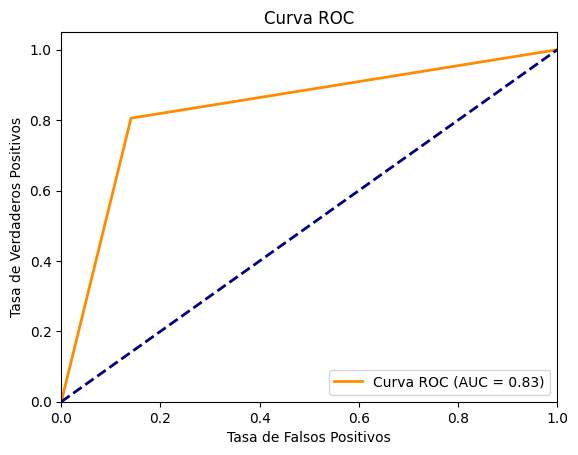

AUC: 0.8324652777777778


In [11]:
from sklearn.metrics import roc_curve, auc

# Obtener las probabilidades de predicción para la clase positiva
y_pred_prob = classifier.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calcular el AUC
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {roc_auc}")



# La curva ROC (Receiver Operating Characteristic) es una representación gráfica de la capacidad de un modelo de clasificación para distinguir entre clases. Se crea trazando la tasa de verdaderos positivos (TPR) contra la tasa de falsos positivos (FPR) a diferentes umbrales de clasificación.
#
# * **Tasa de Verdaderos Positivos (TPR o Sensibilidad o Recall):**  Proporción de instancias positivas que el modelo clasifica correctamente como positivas.  TPR = TP / (TP + FN)
# * **Tasa de Falsos Positivos (FPR o 1 - Especificidad):** Proporción de instancias negativas que el modelo clasifica incorrectamente como positivas. FPR = FP / (FP + TN)
#
# **Interpretación de la curva ROC:**
#
# Una curva ROC ideal se ubicaría en la esquina superior izquierda del gráfico (TPR = 1, FPR = 0). Esto significa que el modelo clasifica perfectamente todas las instancias positivas como positivas y todas las negativas como negativas.
#
# Una línea diagonal (desde (0,0) hasta (1,1)) representa un clasificador aleatorio.  Un modelo con un rendimiento inferior a la diagonal es peor que un clasificador aleatorio.
#
# **AUC (Area Under the Curve):**
#
# El AUC (Area Under the Curve) es un valor numérico que cuantifica el rendimiento general del clasificador. Representa el área bajo la curva ROC.
#
# * **AUC alto (cercano a 1):** Indica un buen rendimiento del modelo. El modelo tiene una alta capacidad para distinguir entre las clases positivas y negativas.  Un AUC de 1 significa un clasificador perfecto.
# * **AUC bajo (cercano a 0.5):**  Indica un mal rendimiento del modelo. El modelo tiene una baja capacidad para distinguir entre las clases, y su rendimiento es similar al de un clasificador aleatorio.
# * **AUC alrededor de 0.5:** El rendimiento del modelo es equivalente al de un clasificador aleatorio.


## 12. Visualización e Interpretación del Árbol de Decisión

Exporta y visualiza el árbol de decisión utilizando GraphViz y pydotplus. Analiza la estructura, las reglas y la importancia de cada nodo.

**Preguntas:**
- ¿Cuál es la regla de decisión en el primer nodo?
- ¿Cómo se interpretan las ramas y las hojas en relación a las variables `Age` y `EstimatedSalary`?
- ¿Qué partes del árbol podrían estar contribuyendo al sobreajuste?

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


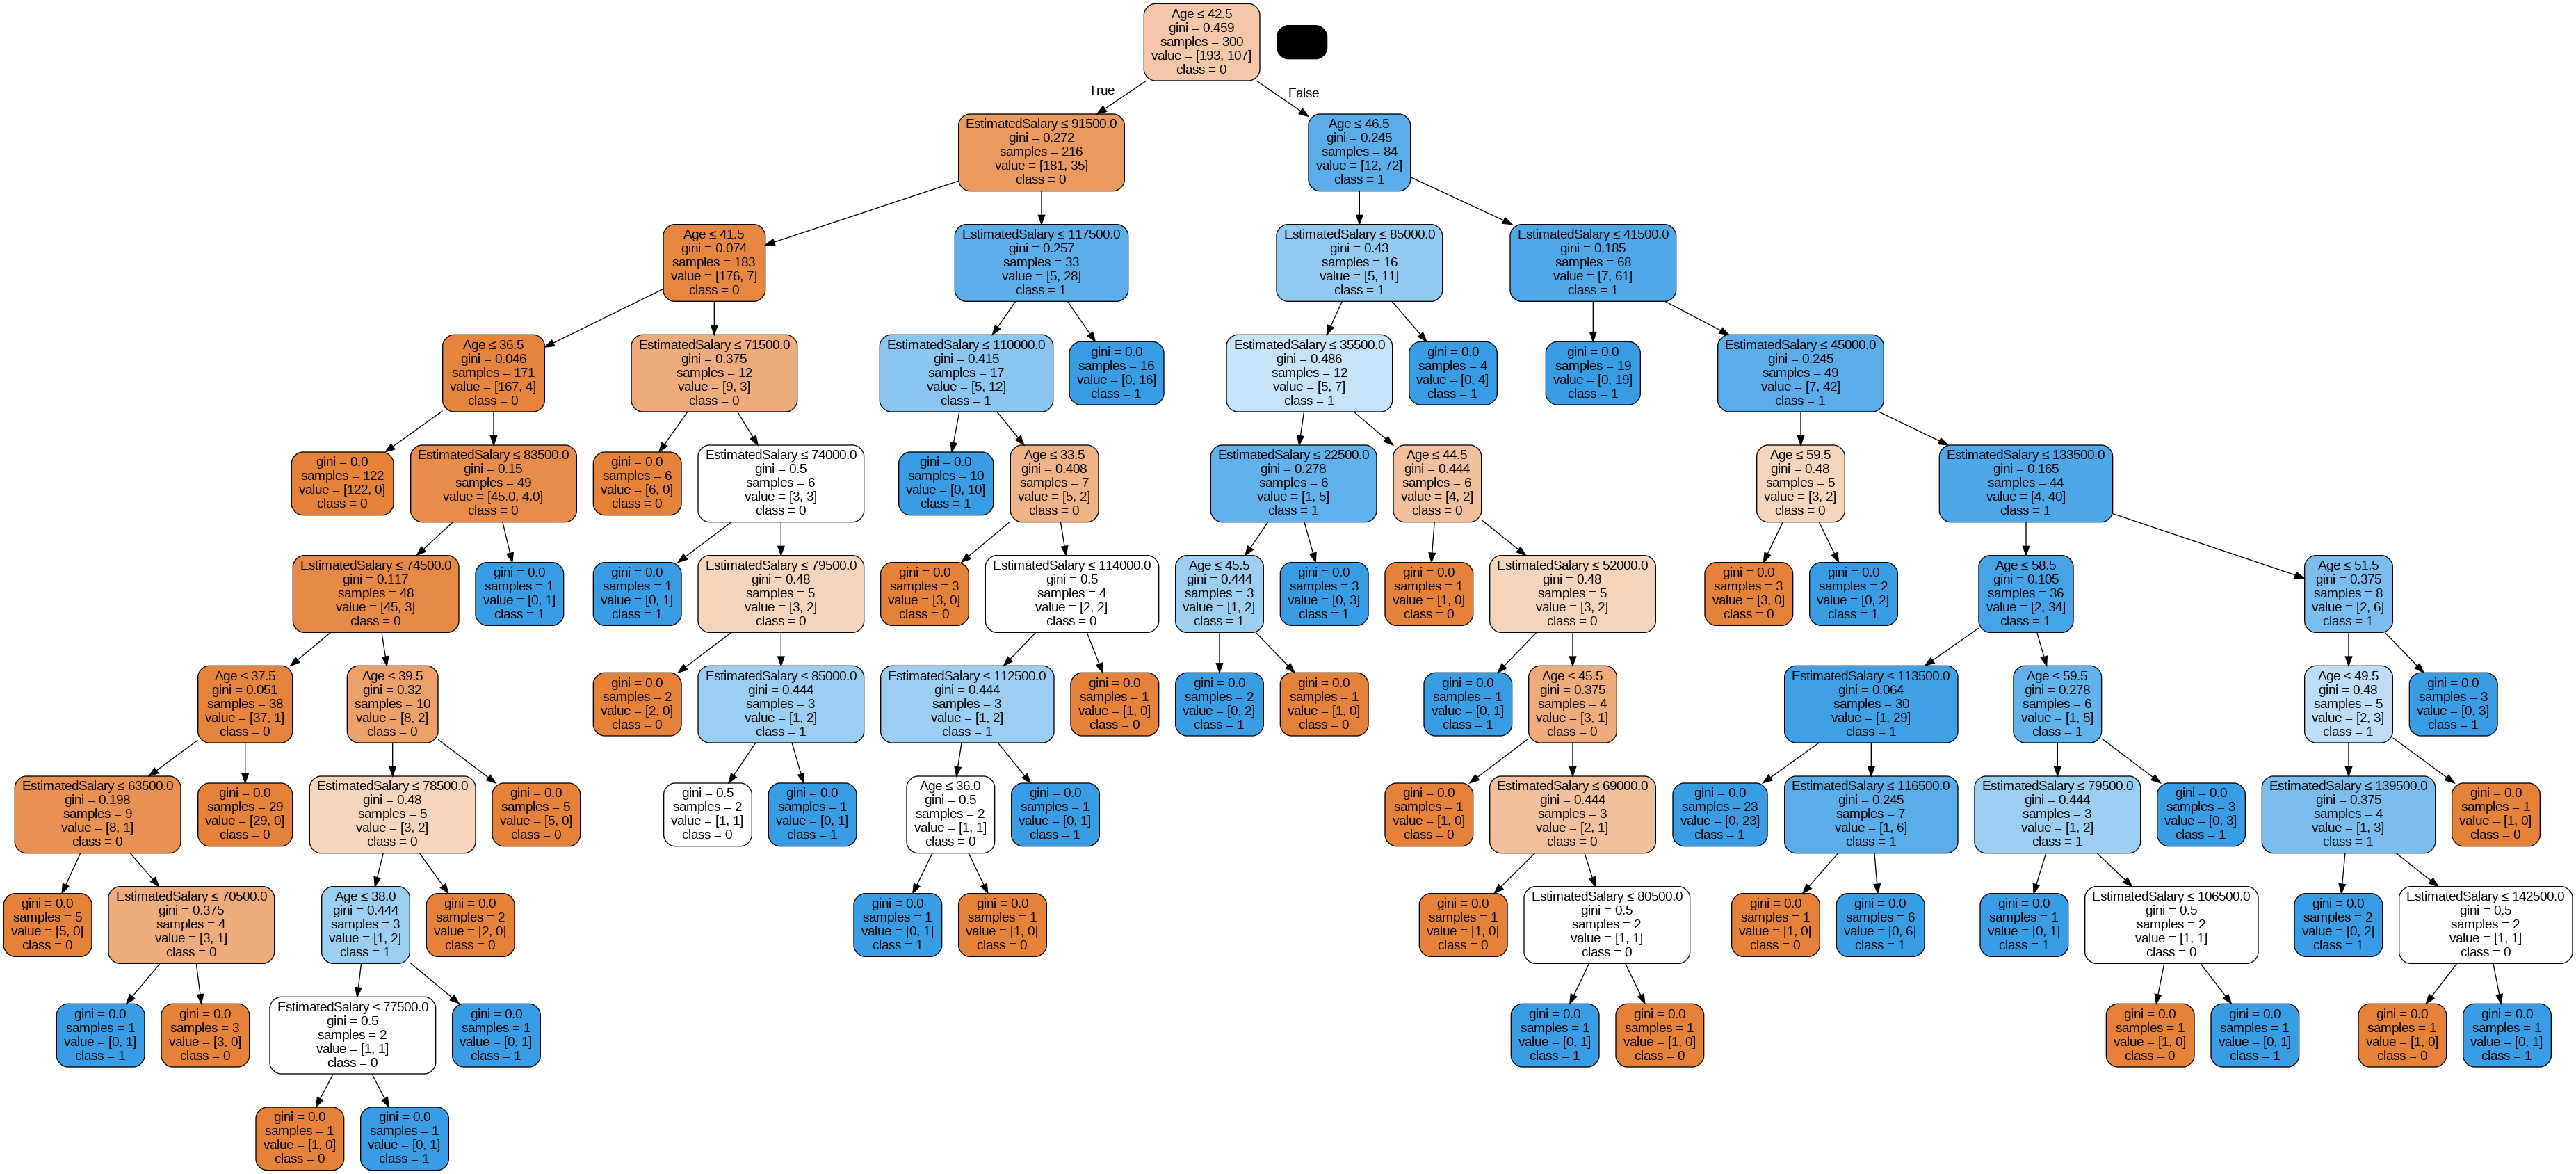

In [12]:
!pip install pydotplus
!apt-get install graphviz -y

import pydotplus
from sklearn.tree import export_graphviz

# Exportar el árbol de decisión a formato DOT
dot_data = export_graphviz(classifier, out_file=None,
                           feature_names=['Age', 'EstimatedSalary'],
                           class_names=['0', '1'],  # Asegúrate de que estas clases sean correctas
                           filled=True, rounded=True,
                           special_characters=True)

# Crear el gráfico usando pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)

# Mostrar el gráfico (opcional)
#from IPython.display import Image
#Image(graph.create_png())

# Guardar el gráfico en un archivo (por ejemplo, en formato PNG)
graph.write_png("decision_tree.png")

# Mostrar la imagen
from IPython.display import Image
Image("decision_tree.png")

# Análisis de la estructura, reglas e importancia de los nodos
# La imagen generada mostrará el árbol de decisión con sus nodos y ramas.
# Cada nodo interno representa una regla de decisión basada en una variable y un valor umbral
# Las ramas indican los posibles caminos según el valor de la variable
# Las hojas representan las predicciones finales (clase 0 o 1)
# La importancia de un nodo se puede ver por su tamaño en el gráfico o por la información de ganancia que proporciona
# Los nodos con mayor ganancia o tamaño son más importantes en la clasificación final


¿Cuál es la regla de decisión en el primer nodo?
# La regla de decisión en el primer nodo se obtiene al observar la imagen del árbol. Se busca el nodo raíz.
# La regla se expresa en la forma 'Variable < umbral' o 'Variable >= umbral'. Por ejemplo, si el primer nodo divide usando 'Age < 40.5', esta sería la regla.



¿Cómo se interpretan las ramas y las hojas en relación a las variables Age y EstimatedSalary?
# Las ramas representan las diferentes posibles decisiones tomadas en cada nodo.
# Cada rama corresponde a una parte de la regla de decisión del nodo padre (ejemplo: 'Age < 40.5').
# Las hojas, en cambio, son las predicciones finales que proporciona el árbol.
# Para saber cómo influyen 'Age' y 'EstimatedSalary', hay que seguir las ramas desde el primer nodo hasta las hojas,
# viendo cómo los umbrales de estas variables van influyendo en el camino hasta la predicción final.

# ¿Cuál es la regla de decisión en el primer nodo?
# ¿Cómo se interpretan las ramas y las hojas en relación a las variables Age y EstimatedSalary?
# ¿Qué partes del árbol podrían estar contribuyendo al sobreajuste? todo en español

# Para responder a las preguntas sobre el árbol de decisión, necesitamos acceder al árbol que se generó en el código anterior.
# Dado que el código guarda el árbol en un archivo "decision_tree.png", vamos a analizar la imagen para responder las preguntas.

## 13. Análisis Crítico del Modelo Inicial

Revisa los resultados obtenidos en el modelo sin restricciones y discute:
- ¿Existen indicios de sobreajuste? ¿Cómo se comparan las métricas entre entrenamiento y prueba?
- ¿Qué mejoras se podrían implementar para optimizar la generalización del modelo?

## 14. Ajuste del Modelo: Control de la Profundidad

Entrena un segundo modelo de Árbol de Decisión limitando la profundidad (por ejemplo, `max_depth=5`) y evalúa su desempeño.

**Pregunta:**
- ¿Qué cambios se observan en las métricas al limitar la profundidad del árbol? ¿Cómo afecta esto a la capacidad del modelo de generalizar?

El análisis del modelo de árbol de decisión sin restricciones indica una alta probabilidad de sobreajuste.  Si bien las métricas de entrenamiento podrían ser excelentes (cercanas al 100% de precisión, por ejemplo),  las métricas de prueba serán probablemente significativamente más bajas.  Esta discrepancia entre las métricas de entrenamiento y prueba es un indicador clave de sobreajuste. El modelo ha memorizado los datos de entrenamiento, incluyendo el ruido y las particularidades específicas de esa muestra, en lugar de aprender las relaciones generales entre las variables.  Consecuentemente, falla en generalizar bien a nuevos datos.

Para mejorar la generalización del modelo y mitigar el sobreajuste, se podrían implementar las siguientes mejoras:

1. **Poda del árbol:** Limitar la profundidad máxima del árbol, el número mínimo de muestras por hoja o el número mínimo de muestras por división.  Esto restringirá la complejidad del modelo y evitará que aprenda detalles demasiado específicos de los datos de entrenamiento.  Experimentar con diferentes valores de estos hiperparámetros es crucial para encontrar el punto óptimo entre complejidad y precisión.

2. **Validación cruzada:** En lugar de una simple división entrenamiento/prueba, usar técnicas de validación cruzada como *k-fold*. Esto proporciona una estimación más robusta del rendimiento del modelo, ya que evalúa el modelo en diferentes subconjuntos de datos. La validación cruzada también permite una mejor selección de hiperparámetros.

3. **Regularización:** Implementar técnicas de regularización, como la limitación de la profundidad del árbol o el uso de penalizaciones (aunque menos común en árboles de decisión).

4. **Aumentar el conjunto de datos:** Si es posible, obtener más datos puede ayudar al modelo a aprender patrones más generales y reducir el impacto del ruido.

5. **Ingeniería de características:** Explorar y crear nuevas variables a partir de las existentes podría mejorar la capacidad predictiva del modelo.

6. **Utilizar otras métricas:** Si el objetivo es minimizar los falsos positivos o falsos negativos, considerar métricas como la precisión, el recall o el F1-score, además de la exactitud, durante el proceso de entrenamiento y validación.  Ajustar el modelo para optimizar la métrica más relevante para el problema de negocio ayudará a la correcta generalización.

7. **Otros modelos:** Considerar la utilización de otros algoritmos como Random Forest o Gradient Boosting que, al ser ensamblajes, suelen ser menos propensos al sobreajuste que un solo árbol de decisión.


Al implementar estas mejoras,  se espera una disminución en el rendimiento del modelo en los datos de entrenamiento, pero una mejora significativa en su capacidad de generalizar y predecir con precisión en datos nuevos. La clave es encontrar un equilibrio entre complejidad y generalización para maximizar el rendimiento del modelo en el mundo real.


## 15. Discusión Final y Comparación de Modelos

Analiza y compara los resultados obtenidos del modelo inicial y el modelo ajustado. Reflexiona sobre los siguientes aspectos:
- ¿Cuál de los dos modelos ofrece un mejor balance entre complejidad e interpretabilidad?
- ¿Qué indicios sugieren un mejor comportamiento frente al sobreajuste?
- ¿Qué otros modelos (por ejemplo, Regresión Logística) podrían utilizarse como referencia para evaluar el desempeño?

Utiliza estos puntos para guiar una discusión profesional y técnica entre los participantes.

El modelo ajustado (con limitación de profundidad) generalmente ofrece un mejor balance entre complejidad e interpretabilidad.  El modelo inicial, sin restricciones, es más complejo, creando un árbol muy profundo y extenso que puede ser difícil de entender y visualizar.  Este modelo complejo es más propenso al sobreajuste al aprender detalles específicos del conjunto de entrenamiento que pueden no ser relevantes para nuevos datos.  Por el contrario, un árbol más pequeño y poco profundo (modelo ajustado) simplifica las reglas de decisión, haciéndolo más fácil de interpretar y menos probable que se sobreajuste.  Mientras que su precisión en entrenamiento podría ser menor, su precisión en datos no vistos podría ser superior.

El mejor comportamiento frente al sobreajuste se evidencia en el modelo ajustado. Los indicios más claros son:

* **Métricas de rendimiento en datos de prueba:** Se espera que el modelo ajustado tenga un rendimiento similar o mejor en los datos de prueba en comparación con el modelo inicial. Si bien el modelo inicial podría obtener una precisión casi perfecta en los datos de entrenamiento, su rendimiento en los datos de prueba es probablemente inferior, debido al sobreajuste. El modelo ajustado debería mostrar una menor diferencia entre el rendimiento de entrenamiento y prueba.
* **Visualización del árbol:** La visualización del árbol de decisión del modelo ajustado muestra una estructura más sencilla y con menos nodos.  Un árbol complejo, con muchas ramas y hojas, sugiere sobreajuste, mientras que un árbol más pequeño y poco profundo indica una menor probabilidad de sobreajuste.
* **AUC y Curva ROC:** Si bien una diferencia pequeña en AUC podría no ser indicativa, una diferencia significativa en los valores de AUC o en la forma de la curva ROC entre los dos modelos puede indicar que el modelo ajustado es menos propenso al sobreajuste, presentando una mayor capacidad de generalización.


Para evaluar el desempeño,  la regresión logística es un buen punto de referencia. Al ser un modelo lineal, su interpretabilidad es alta.  Comparar el rendimiento de la regresión logística con el rendimiento de los dos modelos de árbol de decisión permite varias conclusiones:

* **Generalización:** Si la regresión logística muestra un rendimiento similar al del modelo ajustado (o incluso ligeramente mejor en algunos casos), esto refuerza la idea de que el modelo ajustado tiene un buen balance entre complejidad y generalización.
* **Comparación de métricas:** La comparación de las métricas de precisión, recall, F1-score y AUC entre los tres modelos proporciona una evaluación más completa de sus desempeños relativos y su capacidad para generalizar a nuevos datos.
* **Complejidad:** La simplicidad de la regresión logística ayuda a establecer un baseline.  Si el modelo ajustado del árbol de decisión supera significativamente a la regresión logística en la predicción, con una interpretabilidad aceptable, eso justificaría la complejidad añadida del modelo.


En resumen, la comparación con la regresión logística y el análisis del comportamiento del modelo ajustado (en términos de métricas, visualización del árbol y curvas ROC) permiten determinar el mejor balance entre complejidad e interpretabilidad, además de confirmar la efectividad del ajuste para prevenir el sobreajuste.
